In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno 
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

Acceder a la ruta, contamos con 2 carpetas, Data y Main - En data iran los datasets ya sea archivo .csv xlsx. extraccion de datos desde sql, etc. 

In [2]:
df = pd.read_csv("../Data/argentina_cars.csv")

In [3]:
#Ver la cabecera del dataframe usando pandas 
df.head(10)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
5,34500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
7,12300,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.0,Automática,1.8,Sedán,174000,dólares
8,35500,BMW,220,2016,Blanco,Nafta,2.0,Automática,TURBO,Coupé,66000,dólares
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5.0,Automática,1.6 MSI Nafta,SUV,35000,pesos


In [4]:
# Cambiar el nombre de las columnas
df.rename(index=str, columns={'money': 'total',
                              'brand' : 'marca',
                              'model' : 'modelo',
                              'year' : 'año',
                              'color' : 'color',
                              'door' : 'puertas',
                              'gear' : 'tipo',
                              'motor' : 'motor',
                              'body_type' : 'tipo_cuerpo',
                             'kilometres' : 'kilometros',
                             'currency' : 'moneda'}, inplace=True)

In [5]:
df.head()

,total,marca,modelo,año,color,fuel_type,puertas,tipo,motor,tipo_cuerpo,kilometros,moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [6]:
#conversion para que todos sean en dolares 
# Obtener las filas con la moneda en pesos argentinos
filas_pesos = df['moneda'] == 'pesos'

# Aplicar la conversión a dólares utilizando la tasa de cambio
df.loc[filas_pesos, 'total'] = df.loc[filas_pesos, 'total'] / 257.93

# Redondear los valores sin decimales
df.loc[filas_pesos, 'total'] = df.loc[filas_pesos, 'total'].astype(int)

# Actualizar la moneda a dólares
df.loc[filas_pesos, 'moneda'] = 'dólares'


In [7]:
df.head()

,total,marca,modelo,año,color,fuel_type,puertas,tipo,motor,tipo_cuerpo,kilometros,moneda
0,40127.0,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,dólares
1,42065.0,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500.0,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000.0,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,22486.0,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dólares


<h1>Data Cleaning</h1>

##### Ver si hay datos nulos 

In [8]:
#verificar si hay valores perdidos
df.isnull().sum().sort_values(ascending=False)

color          11
motor          11
tipo            1
tipo_cuerpo     1
total           0
marca           0
modelo          0
año             0
fuel_type       0
puertas         0
kilometros      0
moneda          0
dtype: int64

In [9]:
#Verificar si hay filas con al menos un dato nulo
df[df.isnull().any(axis=1)].head(20)

,total,marca,modelo,año,color,fuel_type,puertas,tipo,motor,tipo_cuerpo,kilometros,moneda
0,40127.0,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,dólares
3,19000.0,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
12,13569.0,Renault,Sandero,2022,Plateado,Nafta,5.0,Manual,NaN,Sedán,111111,dólares
14,41900.0,BMW,Serie 1,2020,Negro,Nafta,5.0,Automática,NaN,Hatchback,34800,dólares
16,38500.0,Chevrolet,Trailblazer,2019,Gris,Diésel,5.0,Automática,NaN,SUV,73000,dólares
24,10855.0,Fiat,Bravo,2013,Negro,Nafta,5.0,Manual,NaN,Hatchback,124000,dólares
31,39545.0,Toyota,Hilux,2022,Negro,Diésel,4.0,Manual,NaN,Pick-Up,21000,dólares
34,12212.0,Ford,Fiesta,2016,Rojo,Nafta,5.0,Manual,NaN,Hatchback,68000,dólares
55,23500.0,Hyundai,Genesis,2012,Gris,Nafta,2.0,Manual,NaN,Coupé,104270,dólares
56,79900.0,Porsche,Panamera,2010,Blanco,Nafta,4.0,Automática,NaN,Sedán,59141,dólares


Como se puede apreciar tenemos 11 datos perdidos en las variables color y 11 en motor, tambien tenemos muchas columnas con datos no numericos es decir NaN o not a number

<h1>Eliminar los datos nulos</h1>

Parte de la limpieza de datos trata de formalizar y estandarizar las variables para poder ser leidas y estudiadas posteriormente, tambien tenemos que eliminar daots nulos y negativos ya que esto podria afectar en la presicion de nuestro modelo, en este caso eliminaremos todos los datos que se han perdido y tambien estandarizaremos el valor de la moneda de pesos argentinos a dolares 

In [10]:
# Nuevo dataframe sin los valores perdidos 
df_new = df.dropna()

In [11]:
# ver si hay valores perdidos
df_new.isnull().sum().sort_values(ascending=False)

total          0
marca          0
modelo         0
año            0
color          0
fuel_type      0
puertas        0
tipo           0
motor          0
tipo_cuerpo    0
kilometros     0
moneda         0
dtype: int64

In [12]:
df_new.to_csv("data_dashboard.csv", index=False)

In [13]:
df_new.head()

,total,marca,modelo,año,color,fuel_type,puertas,tipo,motor,tipo_cuerpo,kilometros,moneda
1,42065.0,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500.0,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
4,22486.0,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dólares
5,34500.0,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000.0,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 1 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total        487 non-null    float64
 1   marca        487 non-null    object 
 2   modelo       487 non-null    object 
 3   año          487 non-null    int64  
 4   color        487 non-null    object 
 5   fuel_type    487 non-null    object 
 6   puertas      487 non-null    float64
 7   tipo         487 non-null    object 
 8   motor        487 non-null    object 
 9   tipo_cuerpo  487 non-null    object 
 10  kilometros   487 non-null    int64  
 11  moneda       487 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 49.5+ KB


In [15]:
# Obtener las columnas numéricas del DataFrame
columnas_numericas = df_new.select_dtypes(include=[int, float]).columns

# Verificar si hay valores negativos en las columnas numéricas
hay_negativos = (df[columnas_numericas] < 0).any().any()

# Imprimir el resultado
if hay_negativos:
    print("El DataFrame contiene valores negativos.")
else:
    print("El DataFrame no contiene valores negativos.")

El DataFrame no contiene valores negativos.


<H1>ANALISIS EXPLORATORIO DE DATOS (EDA)</H1>

In [16]:
df_new['marca'].nunique()

26

Usar la secuencia groupyby es clave ya que nos permite usar dos o mas columnas para tener su minimo, maximo, total y promedio. En este caso hemos agrupado las columnas marca y total para extraer su promedio y poder encontrar las marcas de autos mas costosas que se venden en la consecionaria

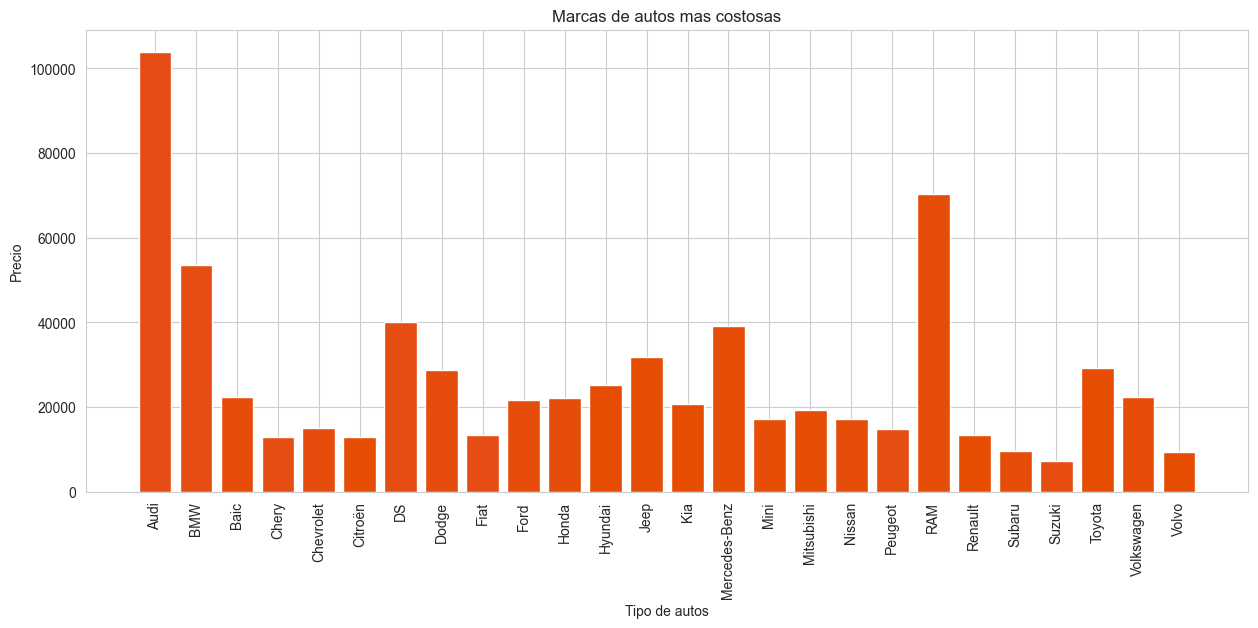

In [17]:
autos = df_new.groupby(by=['marca'], as_index=False)['total'].mean()

plt.subplots(figsize=(15,6))
# Normalizar los valores entre 0 y 1
valores_normalizados = [(v - min(df_new['total'])) / (max(df_new['total']) - min(df_new['total'])) for v in df_new['total']]

# Crear una lista de colores con diferentes transparencias
colores = [(0.9, 0.3,alpha) for alpha in valores_normalizados]
plt.bar(autos.marca, autos.total, color=colores)
plt.xlabel('Tipo de autos')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.title('Marcas de autos mas costosas')
plt.show()

En este caso podemos ver que se vende demasiado los autos Audi, seguidos por los RAM, BMW y DS

¿Cuales son los autos mas caros?

In [18]:
print('Promedio del top 5 carros mas caros')
autos.sort_values(by='total', ascending=False).head(5)

Promedio del top 5 carros mas caros


,marca,total
0,Audi,103940.500000
19,RAM,70395.833333
1,BMW,53624.272727
6,DS,40165.000000
14,Mercedes-Benz,39234.928571


La matriz de correlacion se usa para encontrar las variables que pueden llegar a depende entre si, mientras mas vemos que se acerca el numero a 1 es porque su correlacion es muy fuerte mientras que si nos resultan valores negativos tiene una mala correlacion y por lo tanto no tendriamo que tenerla en consideracion para usarla en un modelo predictivo con aprendizaje supervisado, este tipo de graficos tambien se les conoce como natriz de correlacion usando graficos de calor

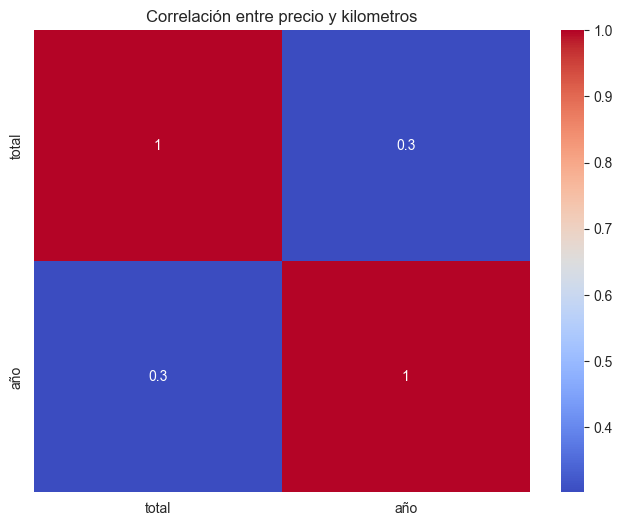

In [19]:
# Calcular la matriz de correlación
correlation_matrix = df_new[['total', 'año']].corr()

# Crear un heatmap para mostrar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Añadir título
plt.title('Correlación entre precio y kilometros')

# Mostrar el heatmap
plt.show()

En este grafico de pastel estamos creando una visualizacion para ver cuales son los tipos de carros que mas tiene la consecionaria y podemos ver que el volkswagen, ford y chevrolet son las marcas mas presentes. Tambien hemos declarado un umbral que se se tiene aproximadamente 26 marcas de carros y para que el grafico no se vea saturado se han aplicado un minimo, Si el numero de carros por marca es menor a 5% del total estos se van a sumar con el resto por lo cual nos daria la categoria OTROS.

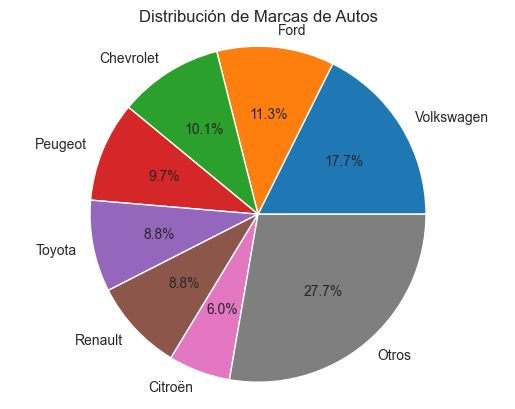

In [20]:
# Obtener los valores únicos y contar su frecuencia
valores = df_new['marca'].value_counts()

# Definir un umbral para agrupar los valores minoritarios
umbral = 0.05  # Por ejemplo, agrupar valores que representen menos del 5% del total

# Filtrar los valores que superan el umbral
valores_principales = valores[valores >= umbral * len(df_new)]

# Agrupar los valores minoritarios bajo una categoría "Otros"
otros_valores = valores[valores < umbral * len(df_new)]
suma_otros = otros_valores.sum()

# Crear un nuevo diccionario con los valores principales y "Otros"
nuevos_valores = dict(valores_principales)
nuevos_valores['Otros'] = suma_otros

# Crear la nueva serie a partir del diccionario
nuevos_valores = pd.Series(nuevos_valores)

# Crear el gráfico de pastel con los nuevos valores
plt.pie(nuevos_valores, labels=nuevos_valores.index, autopct='%1.1f%%')
plt.title('Distribución de Marcas de Autos')
plt.axis('equal')

plt.show()

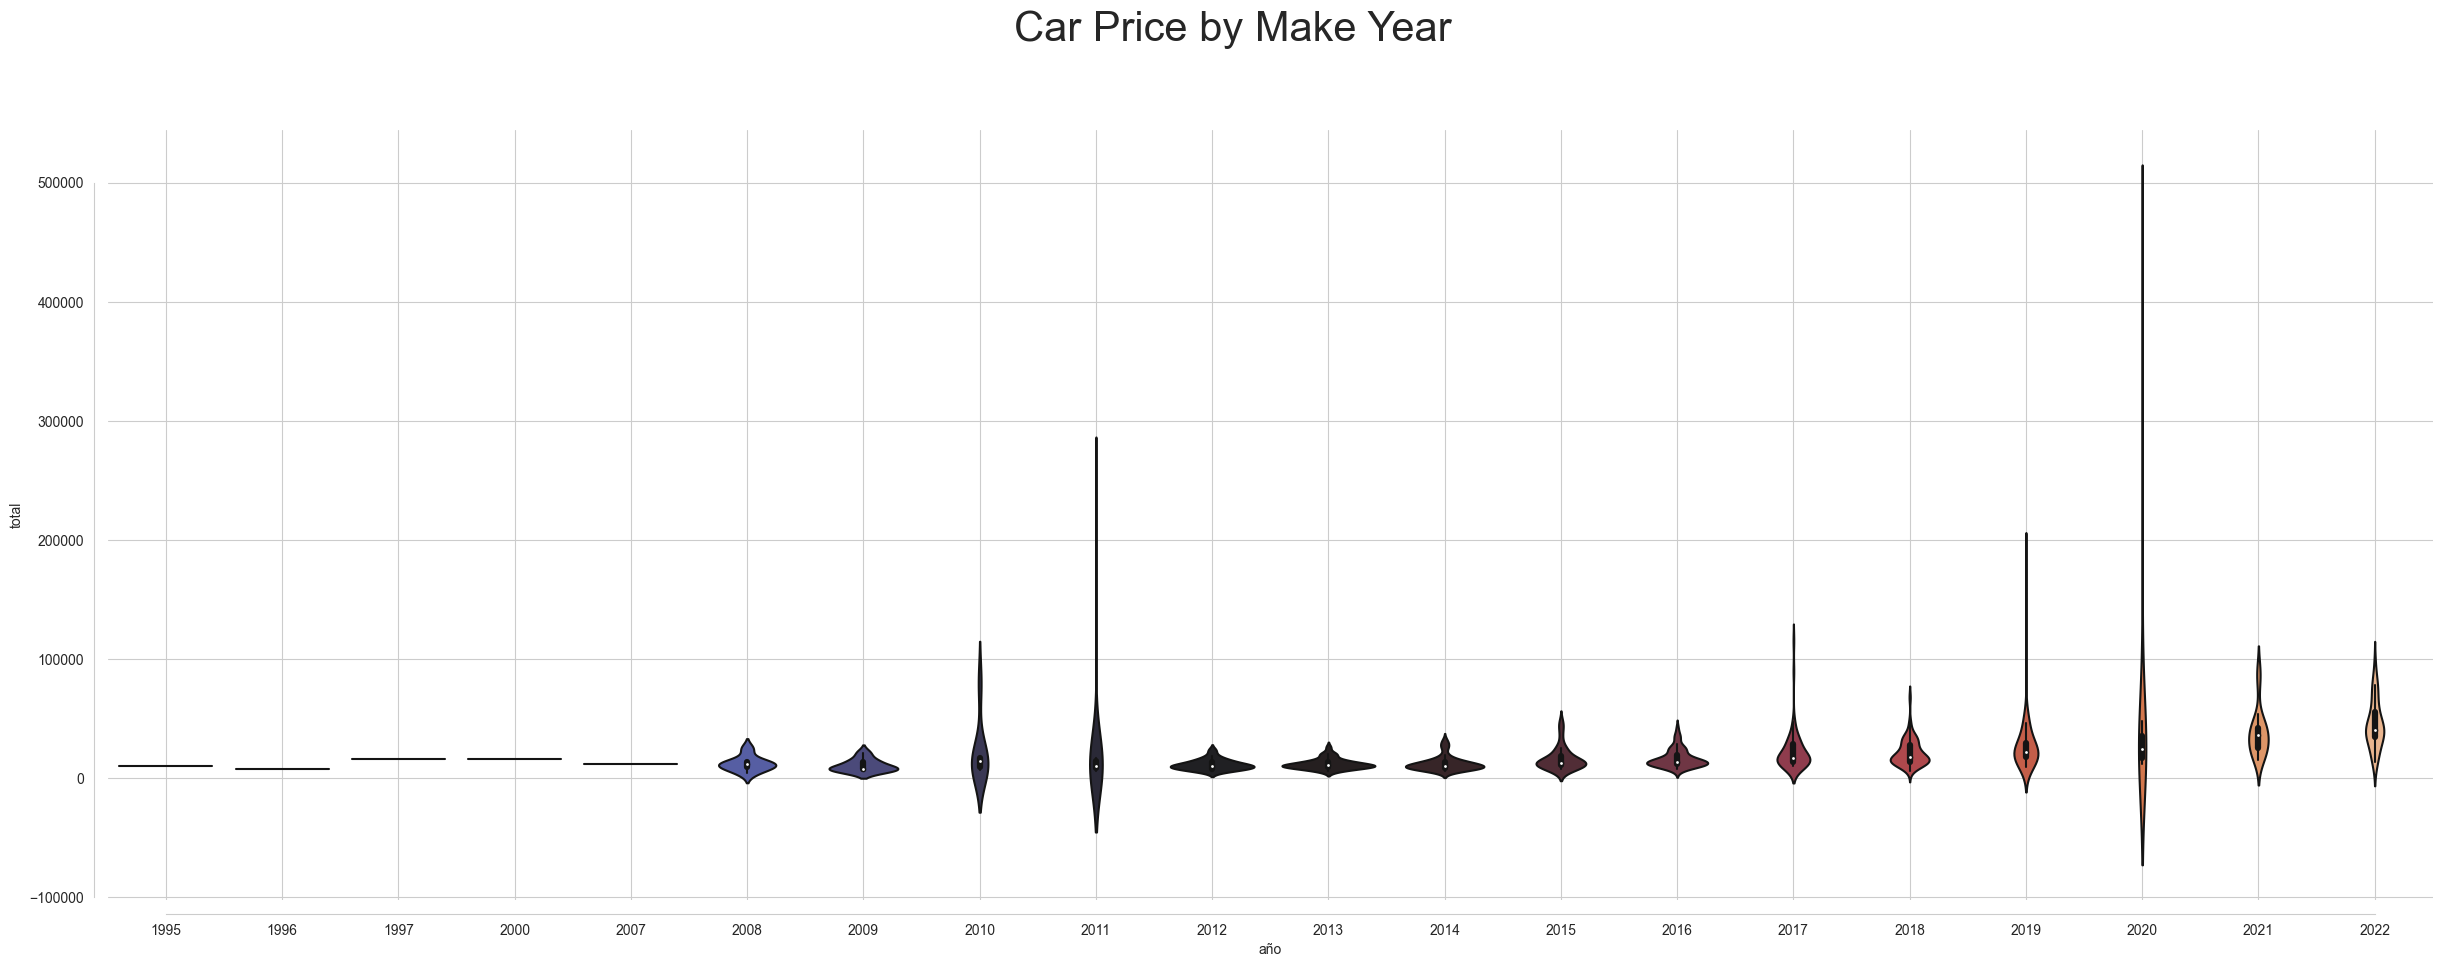

In [21]:
fig= plt.figure(figsize=(30,10))
sns.violinplot(x="año", y="total",
             palette="icefire",
            data=df)
sns.despine(offset=10, trim=True)
plt.grid(True)
plt.suptitle('Car Price by Make Year', y=1.00001,fontsize=30)
plt.show()

Finalmente tenemo un grafico de violín es una representación visual de la distribución de un conjunto de datos numéricos. En este caso, muestra la distribución del precio total de los carros según el año de fabricación.
El eje x del gráfico representa el año de fabricación ("año") y el eje y representa el precio total ("total"). Cada violín en el gráfico representa la distribución de los precios totales para un año específico.
Los violines se dibujan de manera que su ancho representa la densidad de datos en esa región. Los violines más anchos indican una mayor densidad de datos, mientras que los violines más estrechos indican una menor densidad.

<h1>Creacion de modelos predictivos</h1>

Para el análisis predictivo (aprendizaje supervisado), no tenemos suficientes datos para este problema específico. 
Así que se han clasificado los tipos de autos usando el conjunto de datos. Esta técnica se llama Agrupamiento. El agrupamiento es básicamente una técnica que está en el subcategoría de Técnicas de aprendizaje no supervisadas. Etiqueta cada observación con el uso de la relación entre cada observación mediante algoritmos relativamente complejos.

In [22]:
columnas_numericas = df_new.select_dtypes(include=[np.number])
correlacion = columnas_numericas.corr()['total']
print(correlacion)

total         1.000000
año           0.301789
puertas      -0.292722
kilometros   -0.298769
Name: total, dtype: float64


In [23]:
df_new.head(10)

,total,marca,modelo,año,color,fuel_type,puertas,tipo,motor,tipo_cuerpo,kilometros,moneda
1,42065.0,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500.0,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
4,22486.0,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dólares
5,34500.0,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000.0,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
7,12300.0,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.0,Automática,1.8,Sedán,174000,dólares
8,35500.0,BMW,220,2016,Blanco,Nafta,2.0,Automática,TURBO,Coupé,66000,dólares
9,26363.0,Volkswagen,T-Cross,2019,Naranja,Nafta,5.0,Automática,1.6 MSI Nafta,SUV,35000,dólares
10,38500.0,Mercedes-Benz,Clase A,2017,Plateado,Nafta,5.0,Automática,3,Hatchback,55394,dólares
11,20500.0,Mercedes-Benz,Clase A,2013,Blanco,Nafta,5.0,Manual,1.6,Hatchback,162080,dólares


In [24]:
df_latest = df_new.copy()
df_latest = df_latest.drop(['marca', 'modelo', 'tipo_cuerpo','color','puertas','motor','moneda'],axis=1)
df_latest

,total,año,fuel_type,tipo,kilometros
1,42065.0,2022,Nafta,Automática,500
2,35500.0,2022,Nafta,Automática,500
4,22486.0,2019,Nafta,Manual,9000
5,34500.0,2022,Nafta,Automática,10500
6,25000.0,2014,Diésel,Automática,156000
...,...,...,...,...,...
505,20354.0,2018,Nafta,Automática,52000
506,46000.0,2019,Diésel,Automática,49000
507,15353.0,2017,Nafta,Manual,75358
508,44900.0,2019,Diésel,Automática,57500


In [25]:
print(df_new['fuel_type'].unique())
print(df_new['tipo'].unique())

['Nafta' 'Diésel' 'Nafta/GNC' 'Híbrido/Nafta']
['Automática' 'Manual']


La función pd.get_dummies() se utiliza para convertir variables categóricas en variables ficticias (dummies) en un conjunto de datos.

Cuando se trabaja con datos categóricos, como variables que representan diferentes categorías o grupos, los algoritmos de aprendizaje automático no pueden trabajar directamente con ellas en su forma original. En su lugar, se deben convertir estas variables categóricas en representaciones numéricas.

In [26]:
df_latest=pd.get_dummies(df_latest)
df_latest=df_latest.astype(int)
df_latest.tail(10)

,total,año,kilometros,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,tipo_Automática,tipo_Manual
500,13375,2017,87000,0,0,1,0,0,1
501,11631,2018,67082,0,0,1,0,0,1
502,12367,2013,135000,0,0,1,0,0,1
503,29853,2017,154451,0,0,1,0,1,0
504,11204,2014,107000,0,0,1,0,0,1
505,20354,2018,52000,0,0,1,0,1,0
506,46000,2019,49000,1,0,0,0,1,0
507,15353,2017,75358,0,0,1,0,0,1
508,44900,2019,57500,1,0,0,0,1,0
509,11204,2015,84000,0,0,1,0,0,1


In [27]:
columnas_numericas = df_latest.select_dtypes(include=[np.number])
correlacion = columnas_numericas.corr()['total']
print(correlacion)

total                      1.000000
año                        0.301789
kilometros                -0.298769
fuel_type_Diésel           0.123243
fuel_type_Híbrido/Nafta    0.058307
fuel_type_Nafta           -0.082578
fuel_type_Nafta/GNC       -0.077988
tipo_Automática            0.353868
tipo_Manual               -0.353868
Name: total, dtype: float64


In [28]:
df_latest=df_latest.drop(["tipo_Manual","fuel_type_Nafta/GNC","fuel_type_Híbrido/Nafta","fuel_type_Nafta"],axis=1).reset_index().drop("index",axis=1)
df_latest.head(10)

,total,año,kilometros,fuel_type_Diésel,tipo_Automática
0,42065,2022,500,0,1
1,35500,2022,500,0,1
2,22486,2019,9000,0,0
3,34500,2022,10500,0,1
4,25000,2014,156000,1,1
5,12300,2008,174000,0,1
6,35500,2016,66000,0,1
7,26363,2019,35000,0,1
8,38500,2017,55394,0,1
9,20500,2013,162080,0,0


El siguiente código realiza una búsqueda de cuadrícula para encontrar los mejores hiperparámetros (número de componentes y tipos de covarianza) para un modelo de mezcla gaussiana utilizando el criterio BIC como métrica de evaluación.

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(df_latest)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x0000023E76E199D0>)

In [30]:
dft = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
dft["mean_test_score"] = -dft["mean_test_score"]
dft = dft.rename(
    columns={
        "param_n_components": "Numero de componentes",
        "param_covariance_type": "Tipos de covarianza",
        "mean_test_score": "BIC score",
    }
)
dft.sort_values(by="BIC score").head()

,Numero de componentes,Tipos de covarianza,BIC score
17,6,diag,-2.015001e+16
16,5,diag,-1.984798e+16
15,4,diag,-1.745477e+16
5,6,spherical,-4.367585e+13
4,5,spherical,-4.367585e+13


Estos resultados representan las combinaciones que obtuvieron los puntajes BIC más bajos, lo que indica que son las configuraciones que mejor se ajustan a los datos según el criterio BIC.

Posteriormente ajustamos el modelo a nuestro dataframe

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

EM = GaussianMixture(n_components=6,covariance_type="diag")
label = EM.fit_predict(df_latest)
df2 = pd.DataFrame(label)
df2.columns = ["clusters"]
df3 = pd.concat([df_latest,df2],axis=1)
df3

,total,año,kilometros,fuel_type_Diésel,tipo_Automática,clusters
0,42065,2022,500,0,1,3
1,35500,2022,500,0,1,3
2,22486,2019,9000,0,0,4
3,34500,2022,10500,0,1,3
4,25000,2014,156000,1,1,1
...,...,...,...,...,...,...
482,20354,2018,52000,0,1,3
483,46000,2019,49000,1,1,1
484,15353,2017,75358,0,0,4
485,44900,2019,57500,1,1,1


In [32]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=2)
PCA_result=PCA.fit_transform(df_latest)

x=PCA_result[:,0]
y=PCA_result[:,1]

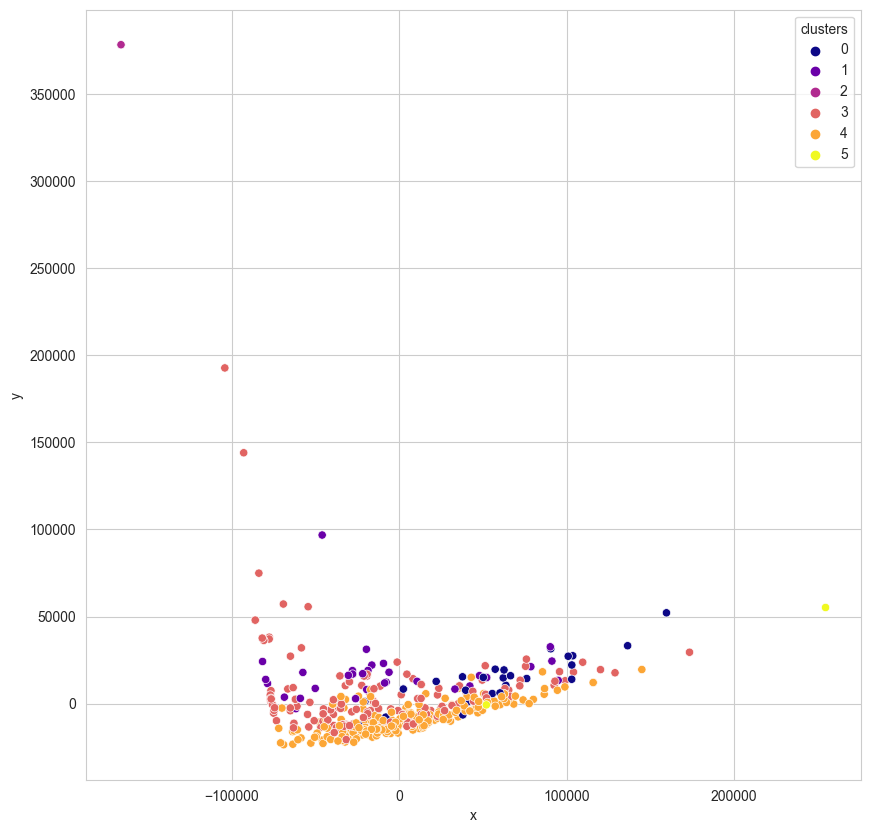

<Figure size 640x480 with 0 Axes>

In [33]:
df4 = pd.DataFrame()
df4["x"]=x
df4["y"]=y
df4["clusters"]= df3["clusters"]
plt.figure(figsize=(10,10))

sns.scatterplot(x='x',y='y',hue='clusters',data=df4,
               legend="full",palette="plasma")

plt.show()
plt.savefig('em.png')